In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import xarray as xr

from scipy.interpolate import griddata

2023-06-15 20:20:26.535897: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

In [4]:
with open('../../../../in_situ_obs_ascat_with_customisations.pickle', 'rb') as handle: 
    ascat_dict = pickle.load(handle)    

In [5]:
station_lon = ascat_dict['Pioneer_8']['lon'][0]
station_lat = ascat_dict['Pioneer_8']['lat'][0]

# Example #1 Pioneer_8

## ASCAT data

In [5]:
ascat_dict['Pioneer_8']['nc_files']

{'ASCA_SZR_1B_M01_20180329145700Z_20180329163558Z_N_O_20180329160627Z': 'ASCATL1SZR_20180329T145700Z_20180329T163558Z_epct_4695022c_P.nc',
 'ASCA_SZR_1B_M02_20180329140000Z_20180329153858Z_N_O_20180329153840Z': 'ASCATL1SZR_20180329T140000Z_20180329T153858Z_epct_3e2792a6_P.nc',
 'ASCA_SZR_1B_M01_20180328234200Z_20180329012358Z_N_O_20180329005813Z': 'ASCATL1SZR_20180328T234200Z_20180329T012358Z_epct_37fd0cf9_P.nc',
 'ASCA_SZR_1B_M02_20180328004800Z_20180328022958Z_N_O_20180328022916Z': 'ASCATL1SZR_20180328T004800Z_20180328T022958Z_epct_e2f37719_P.nc',
 'ASCA_SZR_1B_M01_20180327135700Z_20180327153858Z_N_O_20180327150603Z': 'ASCATL1SZR_20180327T135700Z_20180327T153858Z_epct_24ff3439_P.nc',
 'ASCA_SZR_1B_M02_20180326150000Z_20180326164158Z_N_O_20180326163958Z': 'ASCATL1SZR_20180326T150000Z_20180326T164158Z_epct_b7d01466_P.nc',
 'ASCA_SZR_1B_M01_20180326004500Z_20180326022958Z_N_O_20180326015135Z': 'ASCATL1SZR_20180326T004500Z_20180326T022958Z_epct_ab0bb9e7_P.nc',
 'ASCA_SZR_1B_M02_201803252

In [6]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20180329T140000Z_20180329T153858Z_epct_3e2792a6_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)

In [7]:
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 599, lon: 1211)
Coordinates:
  * lat                  (lat) float64 89.09 88.8 88.5 ... -88.14 -88.43 -88.73
  * lon                  (lon) float64 -179.8 -179.5 -179.2 ... 179.7 180.0
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20180329T140000Z
    stop_sensing_time:         20180329T153858.125000Z
    EPCT_geospatial_lat_max:   76.4227
    EPCT_geospatial_lat_min:   62.1737
    EPCT_geospatial_lon_max:   326.5298
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

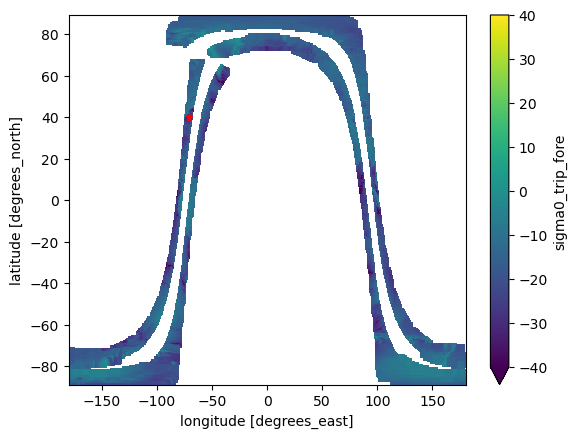

In [8]:
data_ascat['sigma0_trip_fore'].plot(vmax=40, vmin=-40)
plt.plot(-70.8, 40.1, 'r*', markersize=5)

In [9]:
station_lat

40.1334

In [10]:
station_lon

-70.7785

In [11]:
subset_ascat_station = data_ascat.sel(lat=station_lat, lon=station_lon, method='nearest')

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [12]:
data_ascat.where((data_ascat.lon==subset_ascat_station.lon.values) & (data_ascat.lat==subset_ascat_station.lat.values), drop=True)

<xarray.Dataset>
Dimensions:              (lat: 1, lon: 1)
Coordinates:
  * lat                  (lat) float64 40.03
  * lon                  (lon) float64 -70.68
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 54.51
    azi_angle_trip_mid   (lat, lon) float32 100.1
    azi_angle_trip_aft   (lat, lon) float32 145.6
    f_f_fore             (lat, lon) float32 0.0
    f_f_mid              (lat, lon) float32 0.0
    f_f_aft              (lat, lon) float32 0.0
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 76.0
    sigma0_trip_fore     (lat, lon) float32 -28.43
    sigma0_trip_mid      (lat, lon) float32 -22.44
    sigma0_trip_aft      (lat, lon) float32 -26.51
    swath_indicator      (lat, lon) float32 1.0
    crs                  (lon, lat) object b''
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20180329T140000Z
    stop_sensing_time:         20180329T153858.125000Z
    EPCT_geospatial_lat_max:   76.4227
    EPCT_geospatial_lat_min:   62.1737
    EPCT_geospatial_lon_max:   326.5298
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [13]:
lon_i, lat_i = np.nonzero(xr.where((data_ascat.lon==subset_ascat_station.lon.values) & (data_ascat.lat==subset_ascat_station.lat.values), 1, 0).data)

In [14]:
dx2=8
dy2=8

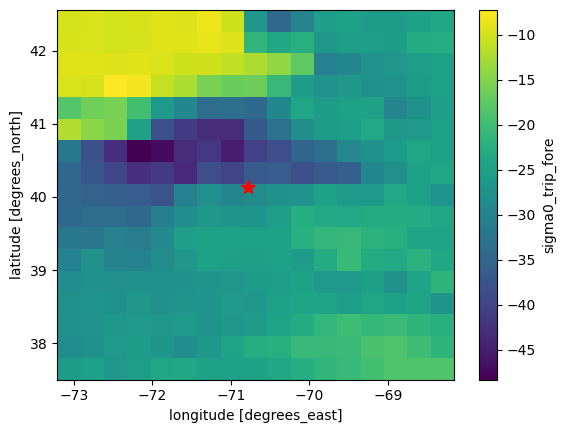

In [15]:
cropped_image = data_ascat.isel(lat=slice(lat_i[0]-dx2, lat_i[0]+dx2+1), lon=slice(lon_i[0]-dx2, lon_i[0]+dx2+1))
cropped_image.where(cropped_image['sigma0_trip_fore'] > -2000).sigma0_trip_fore.plot()
plt.plot(station_lon, station_lat, 'r*', markersize=10)

In [16]:
cropped_image['lat'].values

array([42.40790007, 42.11053368, 41.81316728, 41.51580088, 41.21843449,
       40.92106809, 40.62370169, 40.3263353 , 40.0289689 , 39.7316025 ,
       39.4342361 , 39.13686971, 38.83950331, 38.54213691, 38.24477052,
       37.94740412, 37.65003772])

In [17]:
cropped_image['sigma0_trip_fore'].values.shape

(17, 17)

In [18]:
cropped_image['sigma0_trip_fore']

<xarray.DataArray 'sigma0_trip_fore' (lat: 17, lon: 17)>
array([[ -9.907756,  -9.57672 , -10.135205, ..., -25.856518, -24.936218,
        -24.080519],
       [ -9.819345,  -9.528297, -10.048033, ..., -25.727928, -23.062277,
        -22.95722 ],
       [ -9.203326,  -9.206004,  -9.48582 , ..., -26.370726, -25.527271,
        -24.910799],
       ...,
       [-27.755793, -27.2483  , -26.455688, ..., -20.53046 , -21.652988,
        -22.388943],
       [-28.268728, -27.304804, -26.253578, ..., -18.706287, -20.080019,
        -21.652988],
       [-25.788418, -25.139618, -26.42218 , ..., -18.779474, -18.518032,
        -18.518032]], dtype=float32)
Coordinates:
  * lat      (lat) float64 42.41 42.11 41.81 41.52 ... 38.54 38.24 37.95 37.65
  * lon      (lon) float64 -73.06 -72.77 -72.47 -72.17 ... -68.9 -68.6 -68.3
Attributes:
    long_name:     sigma0_trip_fore
    grid_mapping:  crs
    short_name:    sigma0_trip_fore
    comment:       sigma0_trip_fore

lats_cropped_image 

### Missings are not in the same location for different parameters 

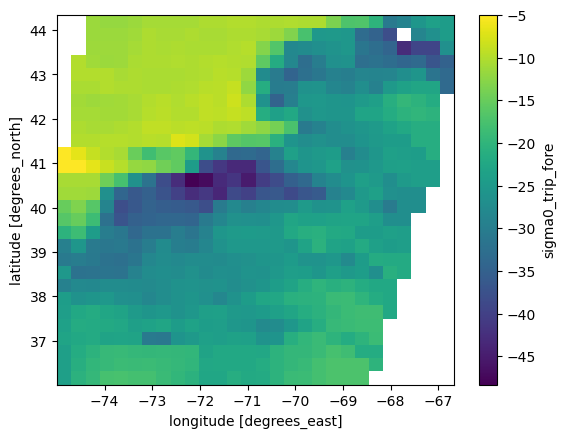

In [111]:
cropped_image = data_ascat.isel(lat=slice(lat_i[0]-14, lat_i[0]+14), lon=slice(lon_i[0]-14, lon_i[0]+14))
cropped_image.where(cropped_image['sigma0_trip_fore'] > -2000).sigma0_trip_fore.plot()

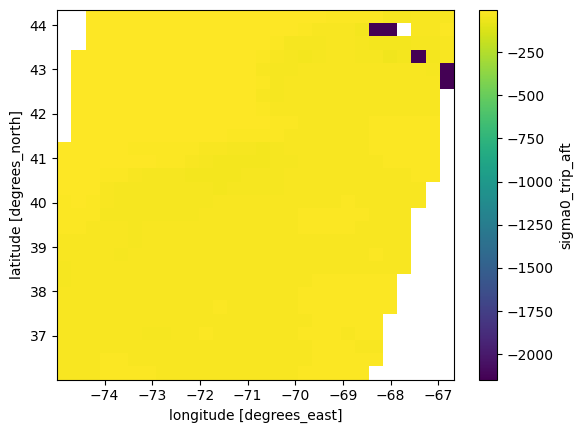

In [112]:
cropped_image = data_ascat.isel(lat=slice(lat_i[0]-14, lat_i[0]+14), lon=slice(lon_i[0]-14, lon_i[0]+14))
cropped_image.where(cropped_image['sigma0_trip_fore'] > -2000).sigma0_trip_aft.plot()

## ERA5 data

In [20]:
data_dir_era5 = '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/era5_buoys/'

In [21]:
file = 'era_u10m_Pioneer_8.nc'
era5 = xr.open_dataset(data_dir_era5 + file)
era5

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5, time: 78912)
Coordinates:
  * longitude  (longitude) float32 -71.28 -71.03 -70.78 -70.53 -70.28
  * latitude   (latitude) float32 40.63 40.38 40.13 39.88 39.63
  * time       (time) datetime64[ns] 2012-01-01 ... 2020-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-22 20:02:58 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [22]:
era5 = era5.sel(time='2018-03-29 14:00:00')
era5

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5)
Coordinates:
  * longitude  (longitude) float32 -71.28 -71.03 -70.78 -70.53 -70.28
  * latitude   (latitude) float32 40.63 40.38 40.13 39.88 39.63
    time       datetime64[ns] 2018-03-29T14:00:00
Data variables:
    u10        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-22 20:02:58 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [23]:
grid_lon_era5, grid_lat_era5 = np.meshgrid(era5['longitude'], era5['latitude'])
# grid_x
grid_lat_era5

array([[40.634, 40.634, 40.634, 40.634, 40.634],
       [40.384, 40.384, 40.384, 40.384, 40.384],
       [40.134, 40.134, 40.134, 40.134, 40.134],
       [39.884, 39.884, 39.884, 39.884, 39.884],
       [39.633, 39.633, 39.633, 39.633, 39.633]], dtype=float32)

In [24]:
#grid_y
grid_lon_era5

array([[-71.279  , -71.02875, -70.7785 , -70.52825, -70.278  ],
       [-71.279  , -71.02875, -70.7785 , -70.52825, -70.278  ],
       [-71.279  , -71.02875, -70.7785 , -70.52825, -70.278  ],
       [-71.279  , -71.02875, -70.7785 , -70.52825, -70.278  ],
       [-71.279  , -71.02875, -70.7785 , -70.52825, -70.278  ]],
      dtype=float32)

In [25]:
grid_lon_ascat, grid_lat_ascat = np.meshgrid(cropped_image['lon'], cropped_image['lat'])

In [26]:
grid_lat_ascat

array([[42.40790007, 42.40790007, 42.40790007, 42.40790007, 42.40790007,
        42.40790007, 42.40790007, 42.40790007, 42.40790007, 42.40790007,
        42.40790007, 42.40790007, 42.40790007, 42.40790007, 42.40790007,
        42.40790007, 42.40790007],
       [42.11053368, 42.11053368, 42.11053368, 42.11053368, 42.11053368,
        42.11053368, 42.11053368, 42.11053368, 42.11053368, 42.11053368,
        42.11053368, 42.11053368, 42.11053368, 42.11053368, 42.11053368,
        42.11053368, 42.11053368],
       [41.81316728, 41.81316728, 41.81316728, 41.81316728, 41.81316728,
        41.81316728, 41.81316728, 41.81316728, 41.81316728, 41.81316728,
        41.81316728, 41.81316728, 41.81316728, 41.81316728, 41.81316728,
        41.81316728, 41.81316728],
       [41.51580088, 41.51580088, 41.51580088, 41.51580088, 41.51580088,
        41.51580088, 41.51580088, 41.51580088, 41.51580088, 41.51580088,
        41.51580088, 41.51580088, 41.51580088, 41.51580088, 41.51580088,
        41.51580088

In [27]:
grid_lon_ascat

array([[-73.06285388, -72.76548748, -72.46812109, -72.17075469,
        -71.87338829, -71.5760219 , -71.2786555 , -70.9812891 ,
        -70.6839227 , -70.38655631, -70.08918991, -69.79182351,
        -69.49445712, -69.19709072, -68.89972432, -68.60235793,
        -68.30499153],
       [-73.06285388, -72.76548748, -72.46812109, -72.17075469,
        -71.87338829, -71.5760219 , -71.2786555 , -70.9812891 ,
        -70.6839227 , -70.38655631, -70.08918991, -69.79182351,
        -69.49445712, -69.19709072, -68.89972432, -68.60235793,
        -68.30499153],
       [-73.06285388, -72.76548748, -72.46812109, -72.17075469,
        -71.87338829, -71.5760219 , -71.2786555 , -70.9812891 ,
        -70.6839227 , -70.38655631, -70.08918991, -69.79182351,
        -69.49445712, -69.19709072, -68.89972432, -68.60235793,
        -68.30499153],
       [-73.06285388, -72.76548748, -72.46812109, -72.17075469,
        -71.87338829, -71.5760219 , -71.2786555 , -70.9812891 ,
        -70.6839227 , -70.38655631,

In [28]:
cropped_image['sigma0_trip_fore'].shape

(17, 17)

In [42]:
regridded_arr = griddata(
            (grid_lat_ascat.flatten(), grid_lon_ascat.flatten()), 
            np.flipud((cropped_image['sigma0_trip_fore'])).flatten(), 
            (grid_lat_era5, grid_lon_era5), 
            method='linear'
)

In [56]:
regridded_arr = griddata(
            (grid_lat_era5.flatten(), grid_lon_era5.flatten()), 
            era5['u10'].values.flatten(), 
            (grid_lat_ascat, grid_lon_ascat), 
            method='linear'
)

In [57]:
regridded_arr.shape

(17, 17)

In [58]:
cropped_image['lat'].min().values.item()

37.65003772237571

In [59]:
cropped_image['lat'].max().values.item()

42.407900074662024

In [60]:
cropped_image['lon'].min().values.item()

-73.06285388046523

In [61]:
cropped_image['lon'].max().values.item()

-68.30499152817892

In [62]:
era5_u10_cropped = era5['u10'].sel(
        {
        'latitude':slice(cropped_image['lat'].max().values.item(), cropped_image['lat'].min().values.item()), 
        'longitude':slice(cropped_image['lon'].min().values.item(), cropped_image['lon'].max().values.item())
        }
        )
era5_u10_cropped

<xarray.DataArray 'u10' (latitude: 5, longitude: 5)>
array([[ 0.338653,  0.36092 ,  0.143277, -0.148349, -0.450031],
       [-0.21946 , -0.133983, -0.264712, -0.502467, -0.81636 ],
       [-0.740939, -0.583634, -0.501748, -0.635351, -0.877415],
       [-1.184125, -0.768953, -0.567113, -0.440694, -0.562085],
       [-1.537525, -0.944934, -0.49672 , -0.225206, -0.103097]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -71.28 -71.03 -70.78 -70.53 -70.28
  * latitude   (latitude) float32 40.63 40.38 40.13 39.88 39.63
    time       datetime64[ns] 2018-03-29T14:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

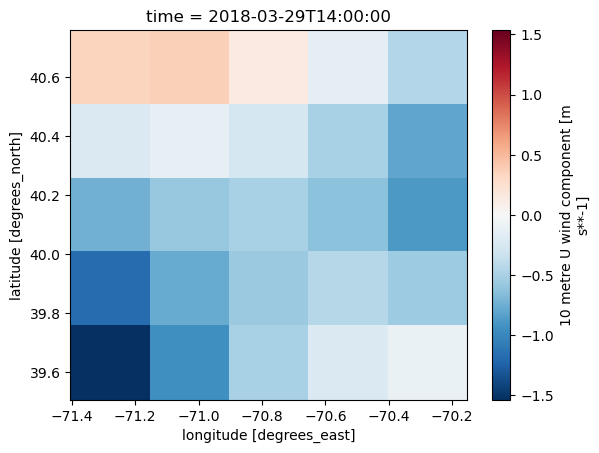

In [63]:
era5_u10_cropped.plot()

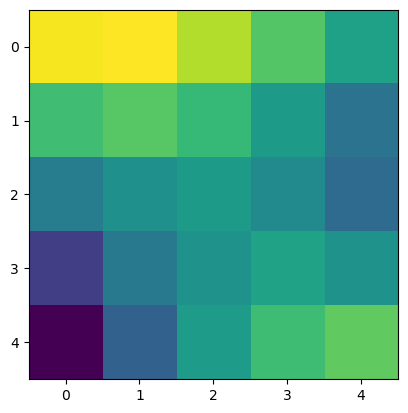

In [64]:
plt.imshow(era5_u10_cropped.values)

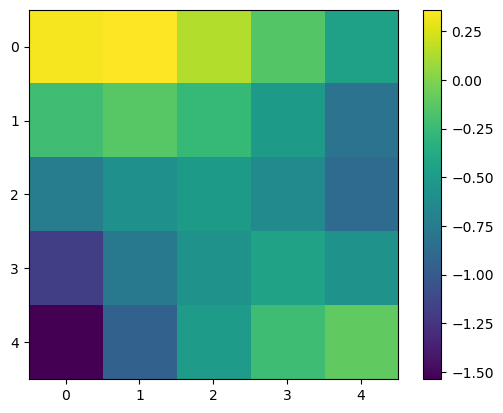

In [65]:
plt.imshow(era5_u10_cropped.values)
plt.colorbar()

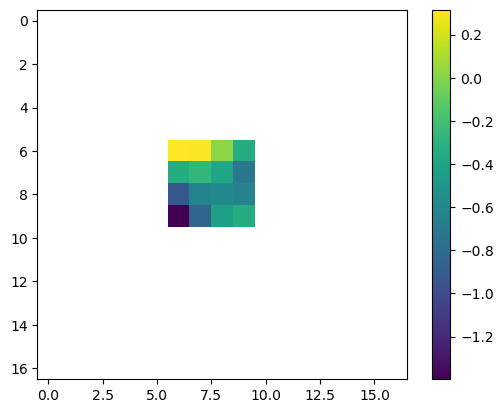

In [66]:
plt.imshow(regridded_arr)
plt.colorbar()

# The same for a smaller image

In [89]:
dx2=1
dy2=1

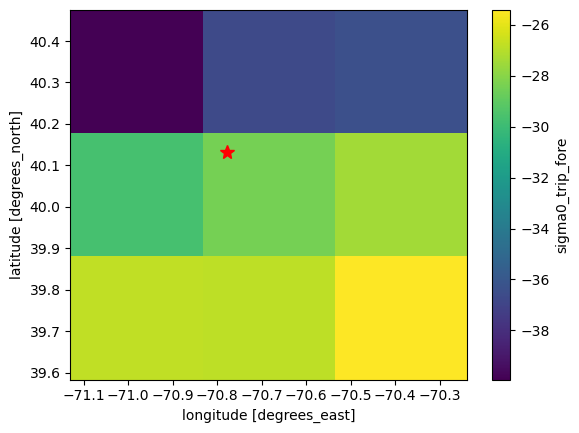

In [90]:
cropped_image = data_ascat.isel(lat=slice(lat_i[0]-dx2, lat_i[0]+dx2+1), lon=slice(lon_i[0]-dx2, lon_i[0]+dx2+1))
cropped_image.where(cropped_image['sigma0_trip_fore'] > -2000).sigma0_trip_fore.plot()
plt.plot(station_lon, station_lat, 'r*', markersize=10)

In [91]:
cropped_image['lat'].values

array([40.3263353, 40.0289689, 39.7316025])

In [92]:
cropped_image['sigma0_trip_fore'].values.shape

(3, 3)

In [93]:
cropped_image['sigma0_trip_fore']

<xarray.DataArray 'sigma0_trip_fore' (lat: 3, lon: 3)>
array([[-39.933044, -36.69909 , -36.376   ],
       [-29.6914  , -28.433147, -27.440205],
       [-26.806011, -26.881357, -25.413212]], dtype=float32)
Coordinates:
  * lat      (lat) float64 40.33 40.03 39.73
  * lon      (lon) float64 -70.98 -70.68 -70.39
Attributes:
    long_name:     sigma0_trip_fore
    grid_mapping:  crs
    short_name:    sigma0_trip_fore
    comment:       sigma0_trip_fore

lats_cropped_image 

## ERA5 data

In [94]:
data_dir_era5 = '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/era5_buoys/'

In [95]:
file = 'era_u10m_Pioneer_8.nc'
era5 = xr.open_dataset(data_dir_era5 + file)
era5

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5, time: 78912)
Coordinates:
  * longitude  (longitude) float32 -71.28 -71.03 -70.78 -70.53 -70.28
  * latitude   (latitude) float32 40.63 40.38 40.13 39.88 39.63
  * time       (time) datetime64[ns] 2012-01-01 ... 2020-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-22 20:02:58 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [96]:
era5 = era5.sel(time='2018-03-29 14:00:00')
era5

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5)
Coordinates:
  * longitude  (longitude) float32 -71.28 -71.03 -70.78 -70.53 -70.28
  * latitude   (latitude) float32 40.63 40.38 40.13 39.88 39.63
    time       datetime64[ns] 2018-03-29T14:00:00
Data variables:
    u10        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-22 20:02:58 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [97]:
grid_lon_era5, grid_lat_era5 = np.meshgrid(era5['longitude'], era5['latitude'])
# grid_x
grid_lat_era5

array([[40.634, 40.634, 40.634, 40.634, 40.634],
       [40.384, 40.384, 40.384, 40.384, 40.384],
       [40.134, 40.134, 40.134, 40.134, 40.134],
       [39.884, 39.884, 39.884, 39.884, 39.884],
       [39.633, 39.633, 39.633, 39.633, 39.633]], dtype=float32)

In [98]:
grid_lon_ascat, grid_lat_ascat = np.meshgrid(cropped_image['lon'], cropped_image['lat'])

In [100]:
regridded_arr = griddata(
            (grid_lat_era5.flatten(), grid_lon_era5.flatten()), 
            era5['u10'].values.flatten(), 
            (grid_lat_ascat, grid_lon_ascat), 
            method='linear'
)

In [101]:
regridded_arr.shape

(3, 3)

In [102]:
cropped_image['lat'].min().values.item()

39.73160250150097

In [103]:
cropped_image['lat'].max().values.item()

40.326335295536765

In [104]:
cropped_image['lon'].min().values.item()

-70.98128910133997

In [105]:
cropped_image['lon'].max().values.item()

-70.38655630730418

In [106]:
era5_u10_cropped = era5['u10'].sel(
        {
        'latitude':slice(cropped_image['lat'].max().values.item(), cropped_image['lat'].min().values.item()), 
        'longitude':slice(cropped_image['lon'].min().values.item(), cropped_image['lon'].max().values.item())
        }
        )
era5_u10_cropped

<xarray.DataArray 'u10' (latitude: 2, longitude: 2)>
array([[-0.501748, -0.635351],
       [-0.567113, -0.440694]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -70.78 -70.53
  * latitude   (latitude) float32 40.13 39.88
    time       datetime64[ns] 2018-03-29T14:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

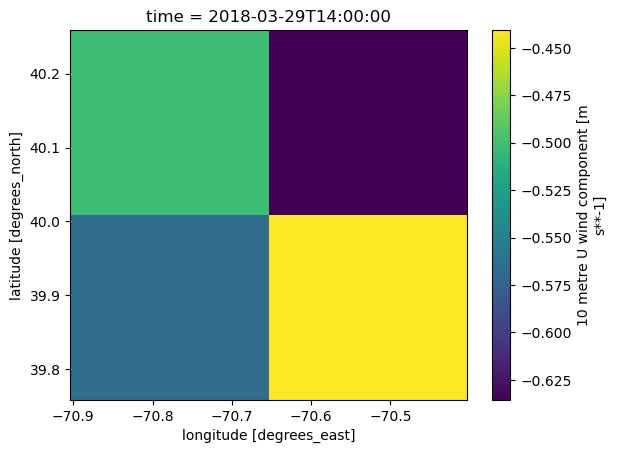

In [107]:
era5_u10_cropped.plot()

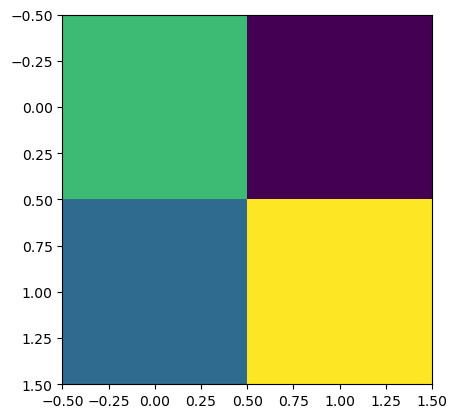

In [108]:
plt.imshow(era5_u10_cropped.values)

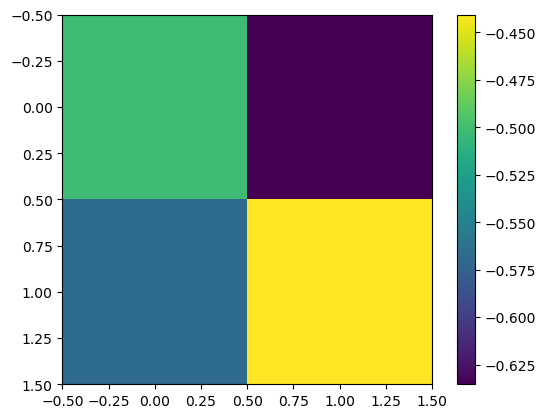

In [109]:
plt.imshow(era5_u10_cropped.values)
plt.colorbar()

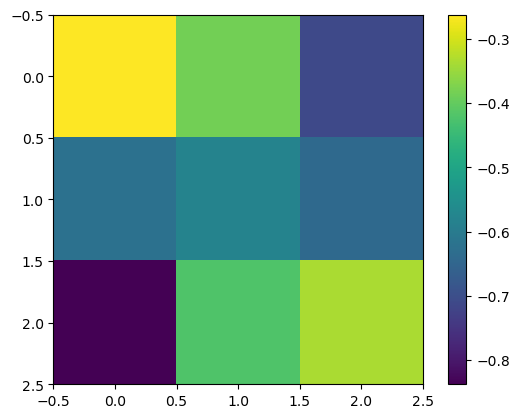

In [110]:
plt.imshow(regridded_arr)
plt.colorbar()

In [9]:
ascat_dict['Pioneer_8'].keys()

dict_keys(['datetime_start', 'datetime_end', 'type', 'lat', 'lon', 'nc_data_location', 'products', 'nc_files'])

In [20]:
ascat_dict['Pioneer_8']['nc_files']['ASCA_SZR_1B_M01_20180329145700Z_20180329163558Z_N_O_20180329160627Z'].split('_')[1][0:4]

'2018'

# Count number of ASCAT collocatios per year

In [30]:
number_of_images = {
    '2011' : 0,
    '2012' : 0,
    '2013' : 0,
    '2014' : 0,
    '2015' : 0,
    '2016' : 0,
    '2017' : 0,
    '2018' : 0,
    '2019' : 0,
    '2020' : 0,
    '2021' : 0
}

for buoy in ascat_dict.keys():
    if 'nc_files' in ascat_dict[buoy].keys():
        for file in ascat_dict[buoy]['nc_files'].keys():
            year = file.split('_')[4][0:4]
            number_of_images[year] = number_of_images[year] + 1

In [31]:
number_of_images['2019']

1077

In [35]:
pd.DataFrame.from_dict(number_of_images, orient='index')

,0
2011,0
2012,0
2013,111
2014,0
2015,407
2016,2884
2017,1887
2018,864
2019,1077
2020,827


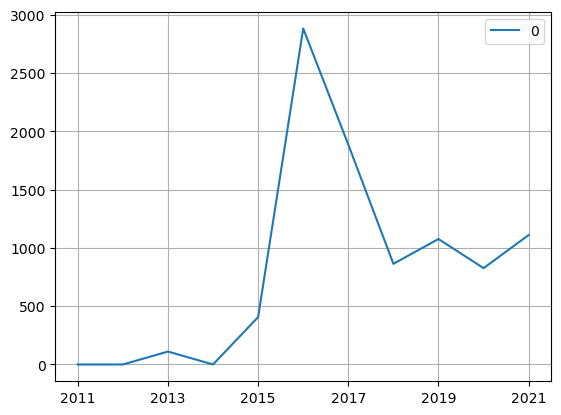

In [37]:
pd.DataFrame.from_dict(number_of_images, orient='index').plot()
plt.grid()